In [40]:
import napari 
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import nd2
import trackpy as tp
import skimage as sk
import scipy as sp
from PIL import Image
from cellpose import models, io
import seaborn as sns

make directories

In [2]:
exp_path = '/Volumes/GoogleDrive/My Drive/postdoc/Raw_Data/20230119_runx2_tracking'
nucpath = os.path.join(exp_path, 'nuc_ims')
spt_path = os.path.join(exp_path, 'spt_stacks')
if not os.path.exists(nucpath):
   os.mkdir(nucpath)
if not os.path.exists(spt_path):
   os.mkdir(spt_path)   

flist = [f for f in os.listdir(spt_path) if f.endswith('.tif')]
cp_path = os.path.join(exp_path, 'cp_output')
tracks_path = os.path.join(exp_path, 'tracks')
vals_path = os.path.join(exp_path, 'vals')
cp_plots = os.path.join(exp_path, 'cp_plots')
tracks_plot = os.path.join(exp_path, 'tracks_plot')
data_list = [nucpath, spt_path, cp_path, tracks_path, vals_path, cp_plots, tracks_plot]
for path in data_list:
    if not os.path.exists(path):
        os.mkdir(path)

cellpose if needed

In [ ]:
for f in flist: 
    nucfile = os.path.join(nucpath, f)
    nucim = sk.io.imread(nucfile)
    cp_plot = os.path.join(cp_plots, f.split('.tif')[0]+'.png')
    cpfile = os.path.join(cp_path, f.split('.tif')[0])
    masks, flows, styles = model.eval(nucim)
    io.save_masks(nucim, masks, flows, cpfile)
    fig,(ax1,ax2) = plt.subplots(1,2)
    ax1.imshow(nucim, cmap='Greys')
    ax2.imshow(masks, cmap='Greys')
    plt.savefig(cp_plot, dpi=300)
    plt.close()

tracking

/Users/lancetdenes/opt/miniconda3/envs/cpnap-env/lib/python3.9/site-packages/trackpy/feature.py:425: UserWarning: No maxima survived mass- and size-based filtering. Be advised that the mass computation was changed from version 0.2.4 to 0.3.0 and from 0.3.3 to 0.4.0. See the documentation and the convenience functions 'minmass_v03_change' and 'minmass_v04_change'.
  warnings.warn("No maxima survived mass- and size-based filtering. "


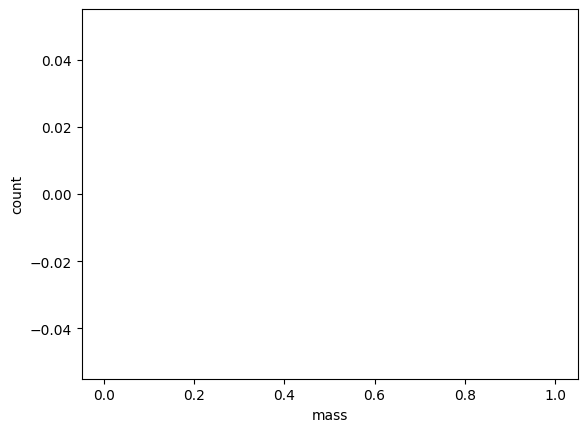

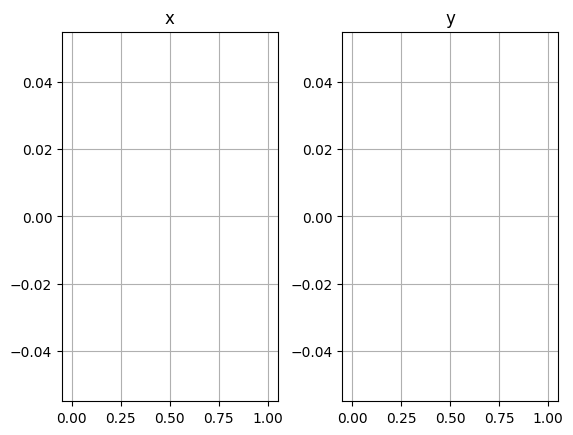

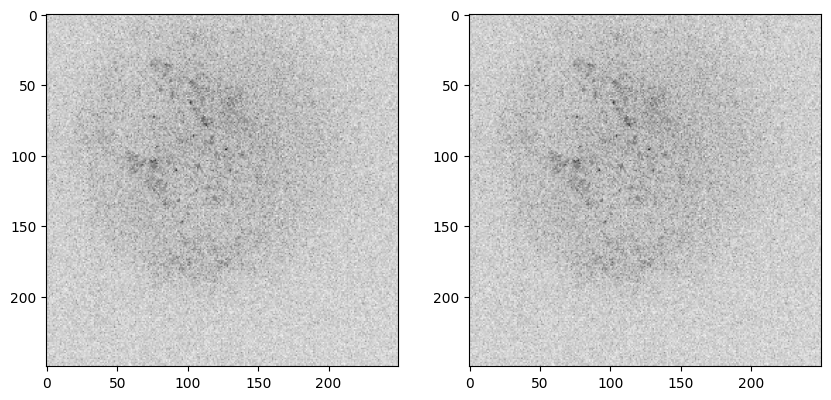

"f = tp.batch(sptim, 9, minmass=60, separation=3, processes='auto')\n\n    raw_tracks = tp.link(f, 10, memory=2)\n    raw_tracks['compartment'] = 'cyto'\n    raw_tracks.loc[nuc_mask[raw_tracks['y'].astype(int), raw_tracks['x'].astype(int)] > 0, 'compartment'] = 'nuc'\n    raw_tracks.to_csv(tracksfile)\n    fig,(ax1,ax2,ax3) = plt.subplots(1,3)\n    ax1.imshow(sptim[0,:,:], cmap='Greys')\n    ax2.imshow(np.amax(sptim, axis=0), cmap='Greys')\n    ax3.imshow(np.amax(sptim, axis=0), cmap='Greys')\n    tp.plot_traj(raw_tracks, ax=ax3, plot_style={'lw': .5})\n    plt.savefig(tracks_plot_file, dpi=300)"

In [17]:
f=flist[0]
sptfile = os.path.join(spt_path, f)
cpfile = os.path.join(cp_path, f.split('.')[0]+'_cp_masks.png')
tracksfile = os.path.join(tracks_path, f.split('.tif')[0]+'.csv')
tracks_plot_file = os.path.join(tracks_plot, f.split('.tif')[0]+'.png')
sptim = sk.io.imread(sptfile)
downsize = np.zeros([sptim.shape[0],250,250])
for i in range(sptim.shape[0]):
    temp = Image.fromarray(sptim[i,:,:])
    temp = temp.resize([250,250])
    downsize[i] = temp
nuc_mask = sk.io.imread(cpfile)
nuc_mask = Image.fromarray(nuc_mask)
nuc_mask = nuc_mask.resize([250,250])
nuc_mask = np.array(nuc_mask)
frame = downsize[0,:,:]

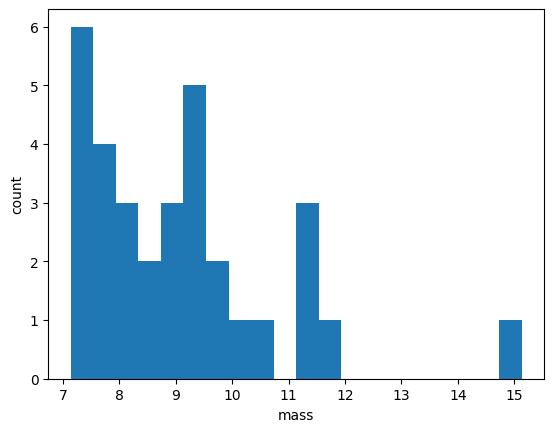

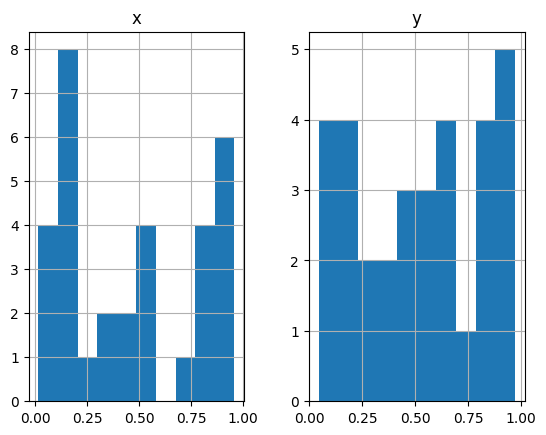

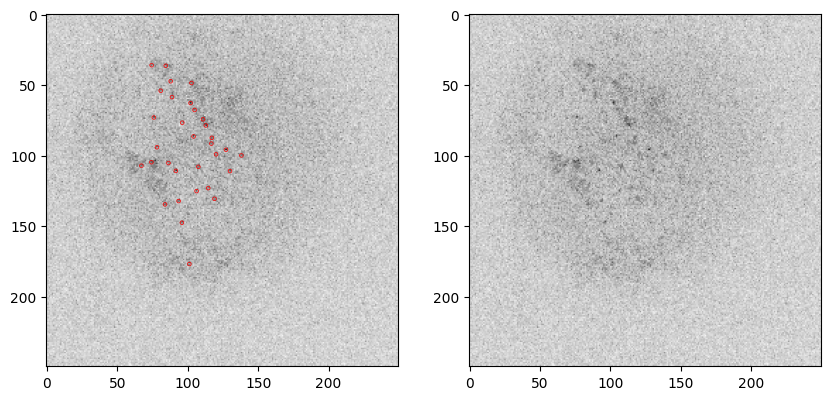

In [28]:
f = tp.locate(frame, 5, minmass=7, separation=5)
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')
plt.show()
tp.subpx_bias(f)
plt.show()
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(10,10))
ax1.imshow(frame, cmap='Greys')
ax1.scatter(f['x'],f['y'], facecolors='none', edgecolors='r', linewidth=.5, s=7)
ax2.imshow(frame, cmap='Greys')
plt.show()

Frame 613: 16 trajectories present.


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/var/folders/fx/s_bk043x2yd924px760sz29w0000gn/T/ipykernel_70881/2641615865.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
/Users/lancetdenes/opt/miniconda3/envs/cpnap-env/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are 

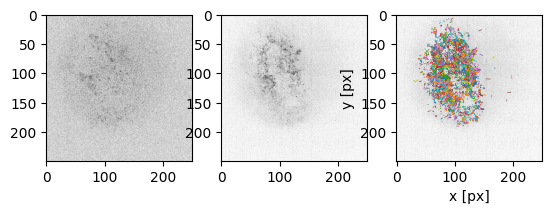

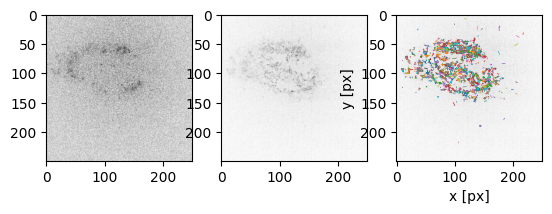

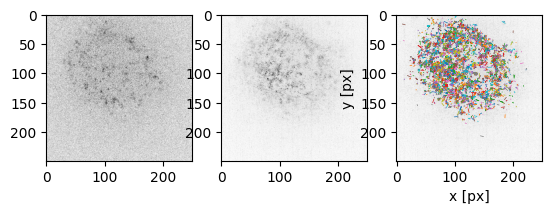

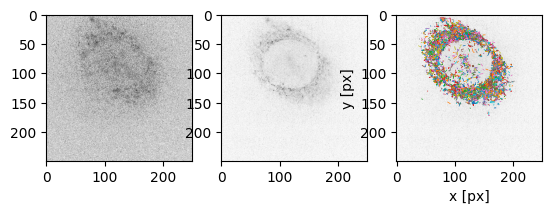

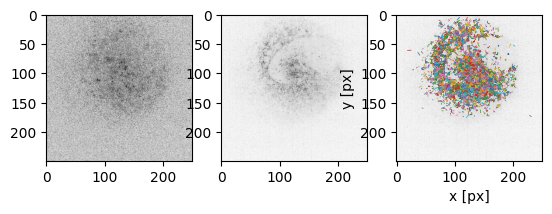

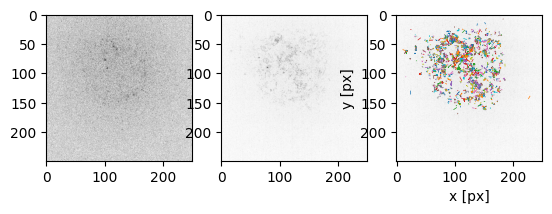

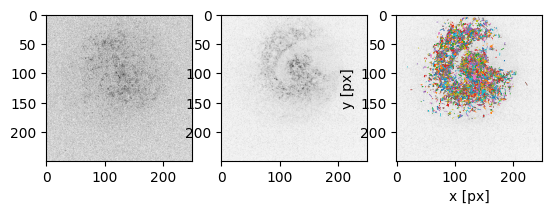

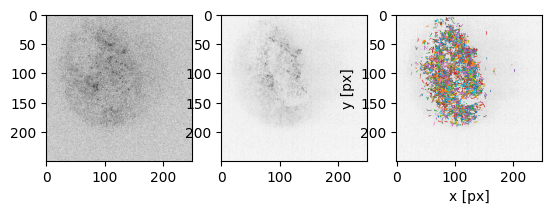

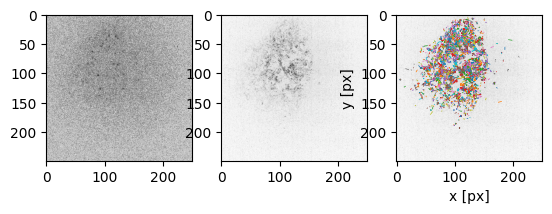

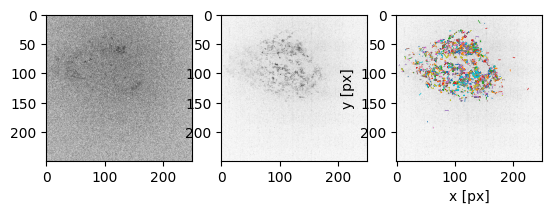

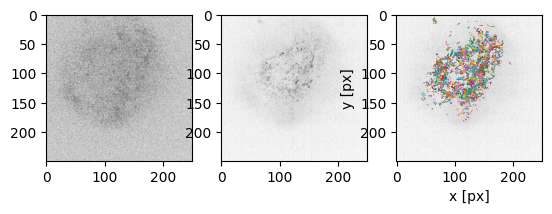

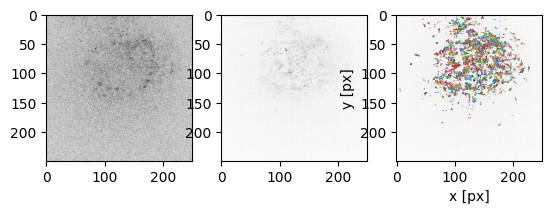

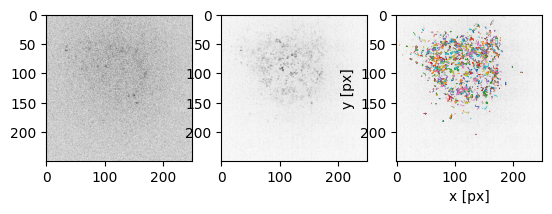

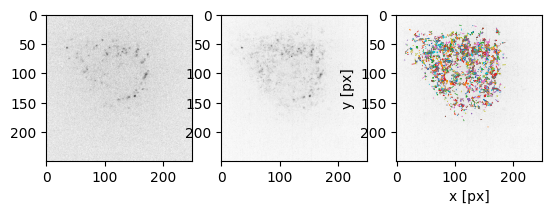

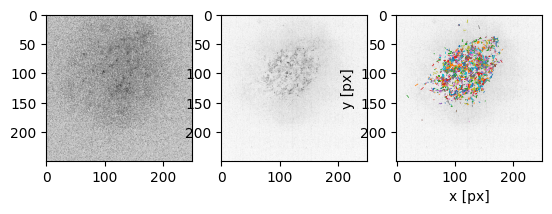

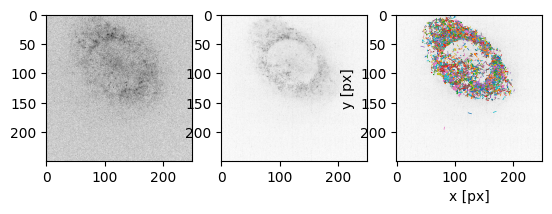

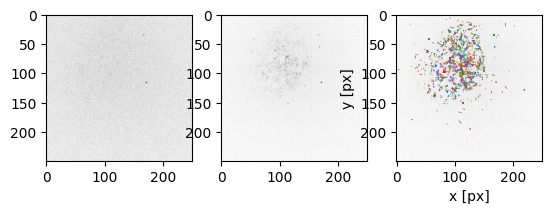

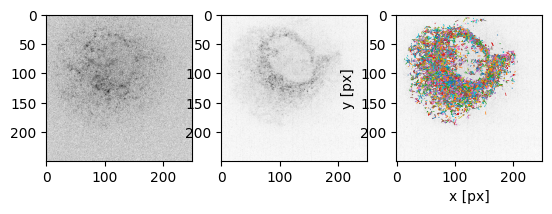

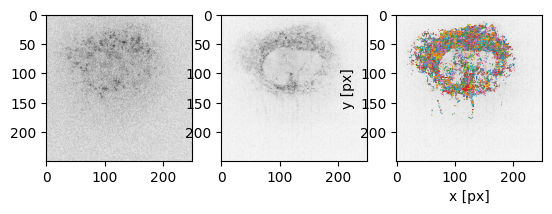

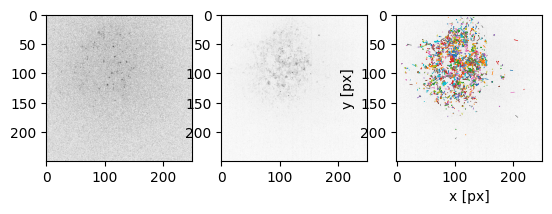

In [10]:
for fl in flist:
    prefix = fl.split('.')[0]
    sptfile = os.path.join(spt_path, fl)
    cpfile = os.path.join(cp_path, prefix+'_cp_masks.png')
    tracksfile = os.path.join(tracks_path, prefix+'.csv')
    tracks_plot_file = os.path.join(tracks_plot, prefix+'.png') 
    nuc_mask = sk.io.imread(cpfile)
    sptim = sk.io.imread(sptfile)

    downsize = np.zeros([sptim.shape[0],250,250])
    for i in range(sptim.shape[0]):
        temp = Image.fromarray(sptim[i,:,:])
        temp = temp.resize([250,250])
        downsize[i] = temp
        
    f = tp.batch(downsize, 5, minmass=8, separation=5, processes='auto')
    raw_tracks = tp.link(f, 6, memory=1)
    raw_tracks['compartment'] = 'cyto'
    raw_tracks.loc[nuc_mask[raw_tracks['y'].astype(int), raw_tracks['x'].astype(int)] > 0, 'compartment'] = 'nuc'
    raw_tracks.to_csv(tracksfile)
    fig,(ax1,ax2,ax3) = plt.subplots(1,3)
    ax1.imshow(downsize[0,:,:], cmap='Greys')
    ax2.imshow(np.amax(downsize, axis=0), cmap='Greys')
    ax3.imshow(np.amax(downsize, axis=0), cmap='Greys')
    tp.plot_traj(raw_tracks, ax=ax3, plot_style={'lw': .5})
    plt.savefig(tracks_plot_file, dpi=300)
    plt.close()

    fig, ax = plt.subplots()
    ax.hist(f['mass'], bins=40)
    ax.set(xlabel='mass', ylabel='count')
    fig.savefig(os.path.join(tracks_plot, prefix+'_hist.png'))
    plt.close()
    
    fig, ax = plt.subplots()
    tp.subpx_bias(f,ax=ax)
    fig.savefig(os.path.join(tracks_plot, prefix+'_subpix.png'))
    plt.close()

    frame = downsize[0,:,:]
    f_frame = f[f['frame'] == 0]
    fig,(ax1,ax2)=plt.subplots(1,2, figsize=(10,10))
    ax1.imshow(frame, cmap='Greys')
    ax1.scatter(f_frame['x'],f_frame['y'], facecolors='none', edgecolors='r', linewidth=.5, s=7)
    ax2.imshow(frame, cmap='Greys')
    fig.savefig(os.path.join(tracks_plot, prefix+'_overlay.png'))
    plt.close()

In [25]:
import math
def arrtize(n, track):
    arr = np.array([track.iloc[n]['x'], track.iloc[n]['y']])
    return(arr)
def angle3pt(a, b, c):
    """Counterclockwise angle in degrees by turning from a to c around b
        Returns a float between 0.0 and 360.0"""
    ang = math.degrees(
        math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang
def append_angles(tracks):
    grouped = tracks.groupby('particle')
    for n,track in grouped:
        for i in range(len(track)):
            try:
                frame = track.iloc[i]['frame']
                a = arrtize(i, track)
                b = arrtize(i+1, track)
                c = arrtize(i+2, track)
                angle = angle3pt(a,b,c)
                tracks.loc[(tracks.particle == n) & (tracks.frame == frame)]['angle'] = angle
            except:
                continue
def append_disps(tracks):
    grouped = tracks.groupby('particle')
    tracks['rel_x'] = tracks['x'] - grouped['x'].transform('first')
    tracks['rel_y'] = tracks['y'] - grouped['y'].transform('first')
    tracks['rel_frame'] = tracks['frame'] - grouped['frame'].transform('first')
    tracks['RperTimeSF'] = ((grouped['rel_x'].diff(periods=1)**2) + (grouped['rel_y'].diff(periods=1)**2))**.5/(grouped['frame'].diff(periods=1))
    tracks['RperTime'] = ((tracks['rel_x'])**2 + (tracks['rel_y'])**2)**.5/(tracks['rel_frame'])
    tracks['R_SF'] = ((grouped['rel_x'].diff(periods=1)**2) + (grouped['rel_y'].diff(periods=1)**2))**.5
    tracks['R'] = ((tracks['rel_x'])**2 + (tracks['rel_y'])**2)**.5
    tracks['R_SF_3'] = ((grouped['rel_x'].diff(periods=1)**2) + (grouped['rel_y'].diff(periods=3)**2))**.5

    #tracks.fillna(0, inplace=True)
    return(tracks)


In [26]:
if not os.path.exists(os.path.join(exp_path, 'processed_tracks')):
    os.mkdir(os.path.join(exp_path, 'processed_tracks'))
flist = [f for f in os.listdir(tracks_path) if f.endswith('.csv')]
for f in flist:
    tracks = pd.read_csv(os.path.join(exp_path, 'tracks', f))
    tracks = append_disps(tracks)
    tracks.to_csv(os.path.join(exp_path, 'processed_tracks', f))

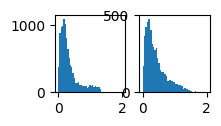

In [38]:
pixel_size = .223232
flist = [f for f in os.listdir(os.path.join(exp_path, 'processed_tracks')) if f.endswith('.csv')]
disps_3 = []
disps = []
final_df = []
for f in flist:
    df = pd.read_csv(os.path.join(exp_path, 'processed_tracks',f))
    df = df[df['compartment'] == 'nuc']
    df = tp.filter_stubs(df, 3)
    if '100mm' in f:
        df['condition'] = 'sorb'
    else:
        df['condition'] = 'ctrl'

    grouped = df.groupby('particle')
    for n,track in grouped:
        for d in track['R_SF_3']:
            disps_3.append(d*pixel_size)
        for d in track['R_SF']:
            disps.append(d*pixel_size)
    final_df.append(df) 
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(2,1))
ax1.hist(disps, bins=np.linspace(0,2,50))
ax2.hist(disps_3, bins=np.linspace(0,2,50))
plt.show()

In [39]:
final_df = pd.concat(final_df)

<AxesSubplot: xlabel='condition', ylabel='R_SF_3'>

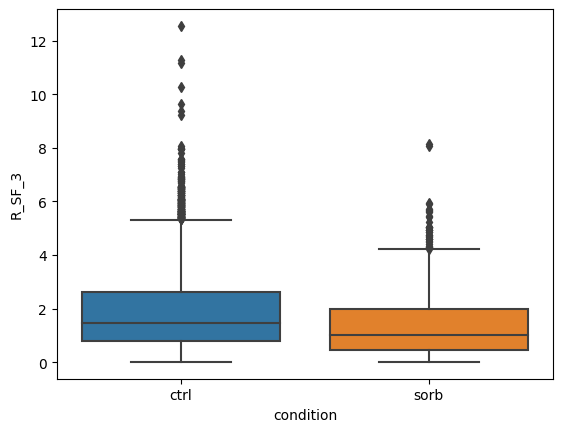

In [41]:
sns.boxplot(data=final_df, x='condition', y='R_SF_3')